`IMPORTING LIBRARIES`

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

`IMPORTING DATA`

In [2]:
data = pd.read_csv('Salary_Data.csv')

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


`CREATING X AND y `

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [6]:
print(y)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


`SPLITTING DATA INTO TRAIN SET AND TEST SET`

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    YearsExperience
28             10.3
24              8.7
12              4.0
0               1.1
4               2.2
16              5.1
5               2.9
13              4.1
11              4.0
22              7.9
1               1.3
2               1.5
25              9.0
3               2.0
21              7.1
26              9.5
18              5.9
29             10.5
20              6.8
7               3.2
10              3.9
14              4.5
19              6.0
6               3.0
    YearsExperience
27              9.6
15              4.9
23              8.2
17              5.3
8               3.2
9               3.7
28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
16     66029.0
5      56642.0
13     57081.0
11     55794.0
22    101302.0
1      46205.0
2      37731.0
25    105582.0
3      43525.0
21     98273.0
26    116969.0
18     81363.0
29    121872.0
20     91738.0
7      54445.0
10     63218.0
14     61111.0
19     93940.0
6      60150.0


`CREATING A MODEL`

In [9]:
from sklearn.linear_model import LinearRegression
#Creating a model
regressor = LinearRegression()

#Train it
regressor.fit(X_train,y_train)

LinearRegression()

`PREDICTING THE VALUES USING predict METHOD`

In [10]:
regressor.predict(np.array([12]).reshape(1,-1))

C:\Users\gumma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([138407.36688815])

`VISUALIZATION OF TRAINING SET`

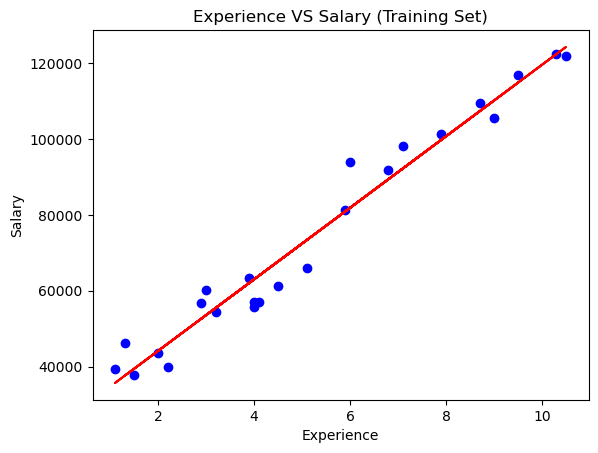

In [11]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('Experience VS Salary (Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

`VISUALIZATION OF TEST DATA SET`

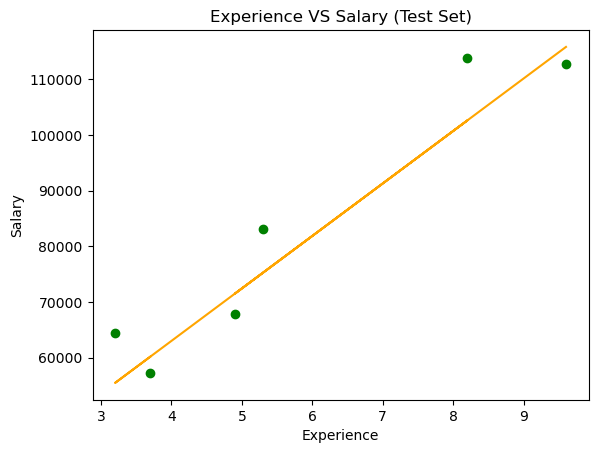

In [12]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,regressor.predict(X_test),color='orange')
plt.title('Experience VS Salary (Test Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [13]:
m = regressor.coef_
print(m)

[9423.81532303]


In [14]:
c = regressor.intercept_
print(c)

25321.583011776813


`THEREFORE THE BEST FIT LINE IS Salary = 9423.81 * Experience + 25321`

# ASSUMPTIONS OF LINEAR REGRESSION

`LINEAR RELATIONSHIP BETWEEN INDEPENDENT AND DEPENDENT VARIABLE`

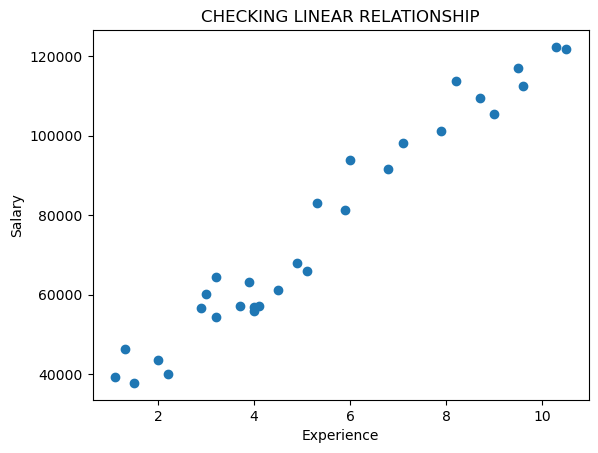

In [20]:
plt.scatter(X,y)
plt.title('CHECKING LINEAR RELATIONSHIP')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

`NORMAL RESIDUAL`

In [24]:
y_pred = regressor.predict(X_test)
residual = y_test - y_pred

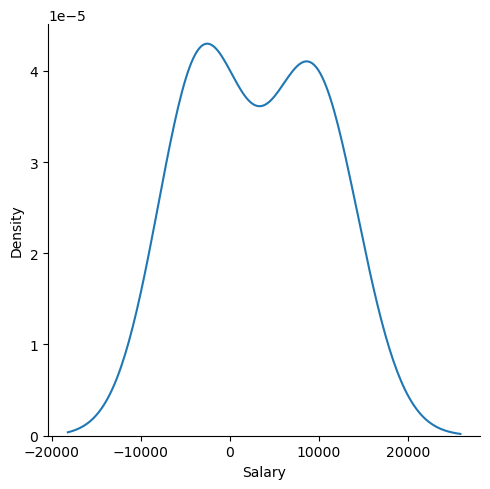

In [29]:
import seaborn as sns 
sns.displot(residual,kind='kde')

`HOMOSCEDASTICITY`

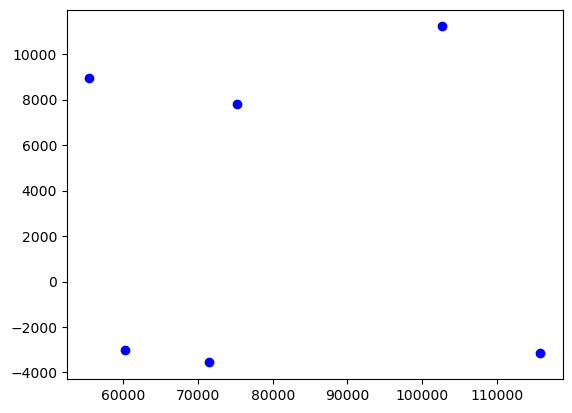

In [30]:
plt.scatter(y_pred,residual,color='blue')

`NO AUTO CORRELATION OF ERRORS`

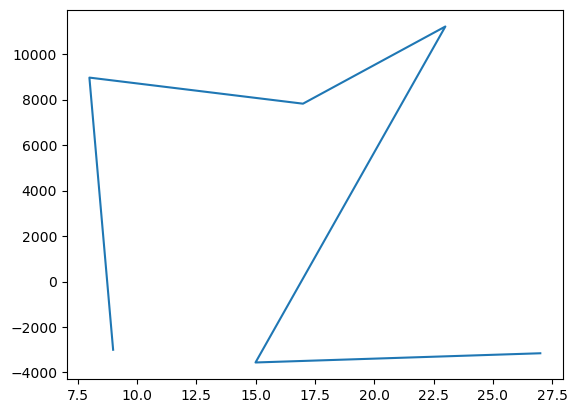

In [31]:
plt.plot(residual)